In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r"C:\Users\MSI\housing_proj\data\train\train.csv")

In [8]:
df

,title,price,location,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
0,Superbe S1 à vendre aux Jardins de Carthage. S...,507500.0,"Les Jardins de Carthage, Le Kram",75.0,1.0,Appartement,1,0,1,0,1,0,0,1,1,0,1,1,1
1,Coquet App S2 de 193 m² à la Vente,890000.0,"La Marsa, La Marsa",133.0,3.0,Appartement,1,1,1,1,0,1,0,1,1,1,1,1,1
2,Fabuleux appartement S2 à vendre,640000.0,"Les Jardins de Carthage, Le Kram",129.0,2.0,Appartement,0,0,0,1,0,1,0,1,1,1,1,1,1
3,Somptueuse maison à vendre à Chotrana 1.5 cham...,2600000.0,"Chotrana 1, La Soukra",2000.0,5.0,Maison,1,0,1,0,1,1,1,1,1,1,1,1,1
4,Appartement en vente à Aouina. Surface de 160 ...,330000.0,"Aouina, La Marsa",160.0,3.0,Appartement,0,0,1,1,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985,Vente Villa Thomas à Hammamet,890000.0,"Hammamet Nord, Hammamet",330.0,5.0,Villa,1,1,0,0,1,0,0,1,1,1,1,1,0
6986,Vente Appartement Nour à Hammamet,320000.0,"Hammamet Nord, Hammamet",74.0,1.0,Appartement,0,1,0,1,1,1,0,1,1,1,1,1,1
6987,Résidence El Bousten à Hammamet Sud,320000.0,"Hammamet Sud, Hammamet",84.0,2.0,Résidence,1,1,0,0,1,1,0,1,1,0,0,0,1
6988,Vente Villa Maher à Hammamet,760000.0,"Hammamet, Hammamet",284.0,4.0,Villa,1,1,0,0,0,0,0,1,1,0,0,0,1


In [45]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(9,9))

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area_m2', ylabel='price'>,
        <Axes: xlabel='rooms', ylabel='price'>,
        <Axes: xlabel='garden', ylabel='price'>,
        <Axes: xlabel='terrace', ylabel='price'>,
        <Axes: xlabel='garage', ylabel='price'>,
        <Axes: xlabel='elevator', ylabel='price'>,
        <Axes: xlabel='swimming_pool', ylabel='price'>,
        <Axes: xlabel='doorman', ylabel='price'>,
        <Axes: xlabel='cellar', ylabel='price'>,
        <Axes: xlabel='air_conditioning', ylabel='price'>,
        <Axes: xlabel='heating', ylabel='price'>,
        <Axes: xlabel='security', ylabel='price'>,
        <Axes: xlabel='double_glazing', ylabel='price'>,
        <Axes: xlabel='reinforced_door', ylabel='price'>,
        <Axes: xlabel='equipped_kitchen', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area_m2'>,
        <Axes: xlabel='area_m2', ylabel='area_m2'>,
        <Axes: xlabel='rooms', ylabel='area_m2'>,
        <Axes

In [46]:
%pip install ydata_profiling


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
df=df.drop(columns=["location","title"])

In [48]:
from ydata_profiling import ProfileReport

In [11]:
df["price"]=df["price"]/1000

In [12]:
df["price"]

0        507.5
1        890.0
2        640.0
3       2600.0
4        330.0
         ...  
6985     890.0
6986     320.0
6987     320.0
6988     760.0
6989    1200.0
Name: price, Length: 6990, dtype: float64

In [ ]:
profile = ProfileReport(df, title='Fromage Profiling Report', explorative=True)
profile.to_notebook_iframe()
#ProfileReport can give us a more detailed analysis of the data , including distributions, correlations, missing values, and more.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 284.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Violin Plot
sns.violinplot(data=df, y='price', ax=axes[0], color='skyblue')
axes[0].set_title('Violin Plot of Price')

# 2. Box Plot (Best for outliers)
sns.boxplot(data=df, y='price', ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot of Price')

# 3. Histogram with KDE
sns.histplot(df['price'], kde=True, ax=axes[2], color='teal')
axes[2].set_title('Distribution of Price (Histogram + KDE)')

plt.tight_layout()
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_18412\3226028238.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


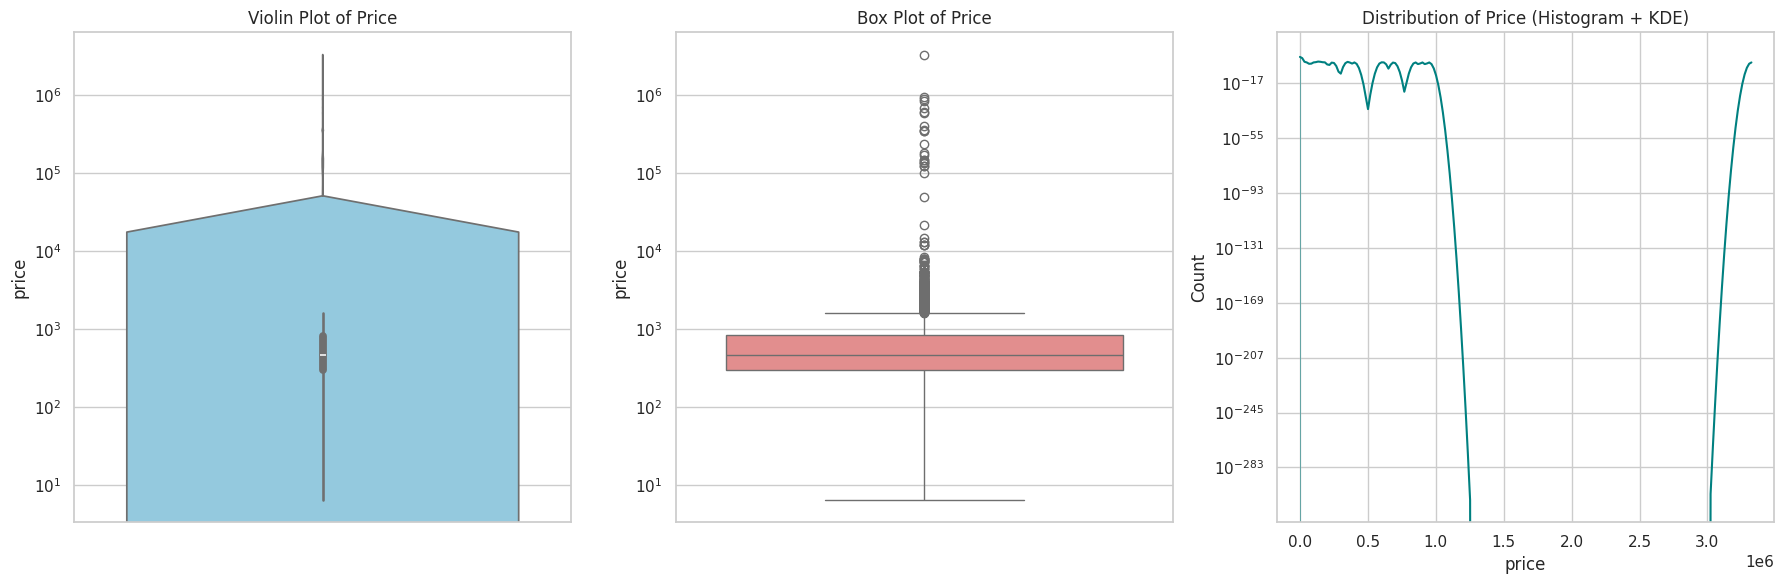

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(data=df, y='price', ax=axes[0], color='skyblue')
axes[0].set_title('Violin Plot of Price')
axes[0].set_yscale('log')

sns.boxplot(data=df, y='price', ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot of Price')
axes[1].set_yscale('log')

sns.histplot(df['price'], kde=True, ax=axes[2], color='teal')
axes[2].set_title('Distribution of Price (Histogram + KDE)')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()


In [24]:
# Summary statistics of price distribution before outlier removal
print("=== Price Statistics (Before Outlier Removal) ===")
print(df['price'].describe())
print(f"\nSkewness: {df['price'].skew():.4f}")
print(f"Kurtosis: {df['price'].kurtosis():.4f}")

=== Price Statistics (Before Outlier Removal) ===
count    6.990000e+03
mean     2.301500e+03
std      4.704377e+04
min      6.500000e+00
25%      3.000000e+02
50%      4.800000e+02
75%      8.500000e+02
max      3.324000e+06
Name: price, dtype: float64

Skewness: 54.7645
Kurtosis: 3630.8530


In [25]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(df)), df['price'], alpha=0.5)
#plt.yscale('log')
plt.title('Outliers - Scatter')
plt.savefig("price_scatter.png", dpi=300, bbox_inches="tight")
plt.close()

plt.figure(figsize=(6,8))
sns.boxplot(y=df['price'])
#plt.yscale('log')
plt.title('Outliers - Boxplot')
plt.savefig("price_boxplot.png", dpi=300, bbox_inches="tight")
plt.close()


In [13]:
lower_bound = 80    # ajuster selon ton dataset
upper_bound = 10000 # ajuster selon ton dataset
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6919 entries, 0 to 6989
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6919 non-null   float64
 1   area_m2           6919 non-null   float64
 2   rooms             6919 non-null   float64
 3   property_type     6919 non-null   object 
 4   garden            6919 non-null   int64  
 5   terrace           6919 non-null   int64  
 6   garage            6919 non-null   int64  
 7   elevator          6919 non-null   int64  
 8   swimming_pool     6919 non-null   int64  
 9   doorman           6919 non-null   int64  
 10  cellar            6919 non-null   int64  
 11  air_conditioning  6919 non-null   int64  
 12  heating           6919 non-null   int64  
 13  security          6919 non-null   int64  
 14  double_glazing    6919 non-null   int64  
 15  reinforced_door   6919 non-null   int64  
 16  equipped_kitchen  6919 non-null   int64  
dtype

In [16]:
from sklearn.preprocessing import MinMaxScaler

# 1. One-Hot Encoding for 'Region'
# We'll also encode 'property_type' if you're preparing for ML, but focusing on Region first as requested
#df_clean= pd.get_dummies(df_clean, columns=['Region'], prefix='Region')

# 2. Identify columns to scale
# garden, terrace, garage, elevator, and is_luxury are already 0/1
# We scale price, area_m2, and rooms
columns_to_scale = ['area_m2', 'rooms','price']

scaler = MinMaxScaler()
df_clean[columns_to_scale] = scaler.fit_transform(df_clean[columns_to_scale])

print("Data after encoding and scaling:")
display(df_clean.head())
display(df_clean.info())

Data after encoding and scaling:


C:\Users\MSI\AppData\Local\Temp\ipykernel_24756\536048223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_to_scale] = scaler.fit_transform(df_clean[columns_to_scale])


,price,area_m2,rooms,property_type,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,air_conditioning,heating,security,double_glazing,reinforced_door,equipped_kitchen
0,0.053977,0.000118,0.000000,Appartement,1,0,1,0,1,0,0,1,1,0,1,1,1
1,0.102273,0.000234,0.086957,Appartement,1,1,1,1,0,1,0,1,1,1,1,1,1
2,0.070707,0.000226,0.043478,Appartement,0,0,0,1,0,1,0,1,1,1,1,1,1
3,0.318182,0.003968,0.173913,Maison,1,0,1,0,1,1,1,1,1,1,1,1,1
4,0.031566,0.000288,0.086957,Appartement,0,0,1,1,0,0,0,1,1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
Index: 6919 entries, 0 to 6989
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6919 non-null   float64
 1   area_m2           6919 non-null   float64
 2   rooms             6919 non-null   float64
 3   property_type     6919 non-null   object 
 4   garden            6919 non-null   int64  
 5   terrace           6919 non-null   int64  
 6   garage            6919 non-null   int64  
 7   elevator          6919 non-null   int64  
 8   swimming_pool     6919 non-null   int64  
 9   doorman           6919 non-null   int64  
 10  cellar            6919 non-null   int64  
 11  air_conditioning  6919 non-null   int64  
 12  heating           6919 non-null   int64  
 13  security          6919 non-null   int64  
 14  double_glazing    6919 non-null   int64  
 15  reinforced_door   6919 non-null   int64  
 16  equipped_kitchen  6919 non-null   int64  
dtype

None

In [17]:
# 1. One-Hot Encoding for 'property_type'
df_clean = pd.get_dummies(df_clean, columns=['property_type'], prefix='Type')

# 2. Convert all boolean columns (including the new Type columns and Region columns) to integers
bool_cols = df_clean.select_dtypes(include=['bool']).columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

print("Final Dataset Info:")
display(df_clean.info())
display(df_clean.head())

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6919 entries, 0 to 6989
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6919 non-null   float64
 1   area_m2           6919 non-null   float64
 2   rooms             6919 non-null   float64
 3   garden            6919 non-null   int64  
 4   terrace           6919 non-null   int64  
 5   garage            6919 non-null   int64  
 6   elevator          6919 non-null   int64  
 7   swimming_pool     6919 non-null   int64  
 8   doorman           6919 non-null   int64  
 9   cellar            6919 non-null   int64  
 10  air_conditioning  6919 non-null   int64  
 11  heating           6919 non-null   int64  
 12  security          6919 non-null   int64  
 13  double_glazing    6919 non-null   int64  
 14  reinforced_door   6919 non-null   int64  
 15  equipped_kitchen  6919 non-null   int64  
 16  Type_Appartement  6919 non-

None

,price,area_m2,rooms,garden,terrace,garage,elevator,swimming_pool,doorman,cellar,...,Type_Chalet,Type_Duplex,Type_Immeuble,Type_Maison,Type_Panthouse,Type_Résidence,Type_Studio,Type_Terrain,Type_Triplex,Type_Villa
0,0.053977,0.000118,0.000000,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.102273,0.000234,0.086957,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.070707,0.000226,0.043478,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.318182,0.003968,0.173913,1,0,1,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0.031566,0.000288,0.086957,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


--- XGBoost Regression Results ---
Mean Squared Error (MSE): 0.003310
R-squared Score (R2): 0.4326


<Figure size 1000x600 with 0 Axes>

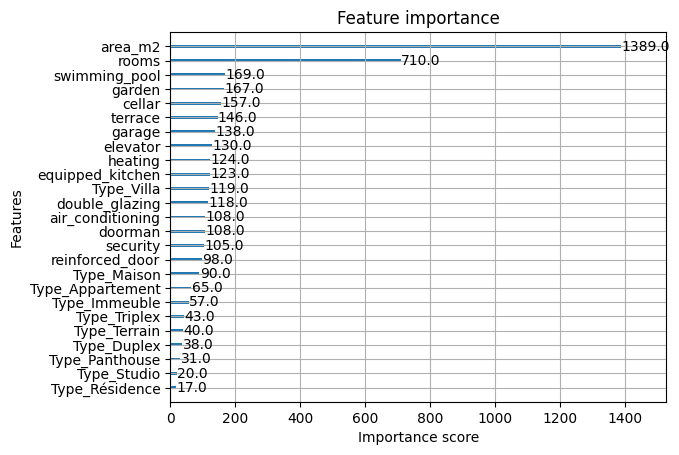

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separate features (X) and target (y)
X = df_clean.drop(columns=['price'])
y =  np.log1p(df_clean['price'])


# 2. Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the XGBoost Regressor
# We use reg:squarederror for regression tasks like price prediction
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_reg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = xgb_reg.predict(X_test)
y_pred = np.expm1(y_pred)  # Convert back to original scale

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- XGBoost Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared Score (R2): {r2:.4f}")

# Display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_reg, importance_type='weight')
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

ValueError: x and y must be the same size

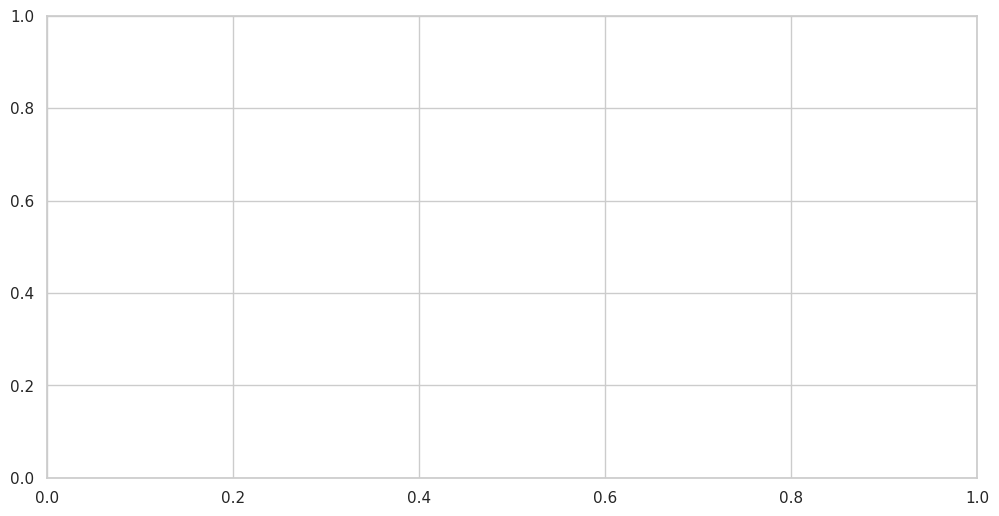

In [394]:
print(y_train.describe())


count    5497.000000
mean        0.000757
std         0.015477
min         0.000000
25%         0.000088
50%         0.000139
75%         0.000245
max         1.000000
Name: price, dtype: float64


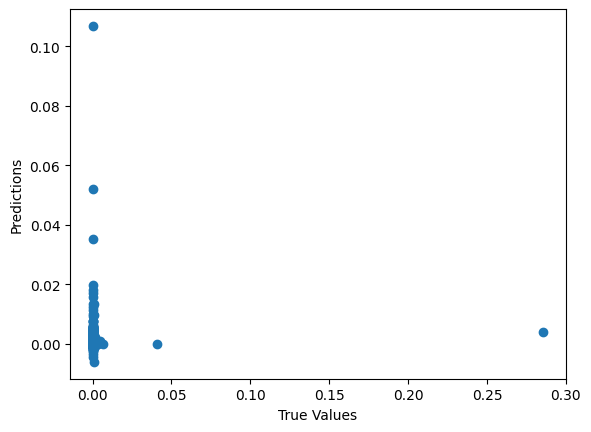

In [395]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


In [490]:
df_clean=df_clean[["area_m2","rooms","amenity_count","price"]]

In [33]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separate features (X) and target (y)
X = df_clean.drop(columns=['price',"property_type"])
y = df_clean['price']

# 2. Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the XGBoost Regressor
# We use reg:squarederror for regression tasks like price prediction
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_reg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- XGBoost Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R-squared Score (R2): {r2:.4f}")

# Display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_reg, importance_type='weight')
plt.show()

--- XGBoost Regression Results ---
Mean Squared Error (MSE): 0.000041
R-squared Score (R2): -0.1269


C:\Users\MSI\AppData\Local\Temp\ipykernel_18412\2757097292.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


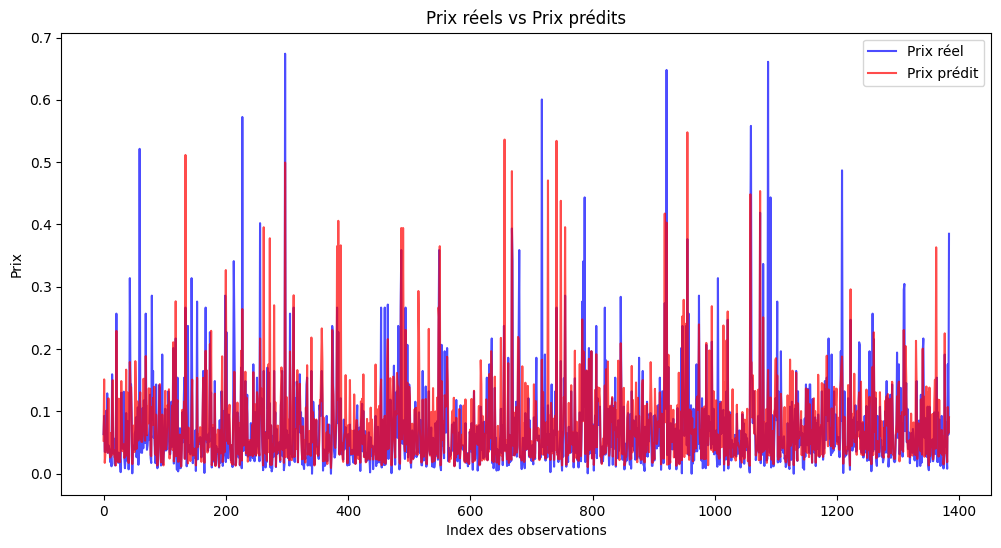

In [21]:
import matplotlib.pyplot as plt

# Assurons-nous que y_test et y_pred sont des arrays
y_test_array = y_test.values if hasattr(y_test, "values") else y_test
y_pred_array = y_pred if hasattr(y_pred, "values") else y_pred

# Créer une figure
plt.figure(figsize=(12,6))

# Tracer les prix réels
plt.plot(y_test_array, label="Prix réel", color="blue", alpha=0.7)

# Tracer les prix prédits
plt.plot(y_pred_array, label="Prix prédit", color="red", alpha=0.7)

plt.title("Prix réels vs Prix prédits")
plt.xlabel("Index des observations")
plt.ylabel("Prix")
plt.legend()
plt.show()


In [399]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 1. Preparation of features and target
# Using the current 'df' which was previously subsetted or preprocessed
X = df.drop(columns=['price'])
y = df['price']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the models to test
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    "Linear Regression": LinearRegression()
}

# 4. Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": round(mse, 6),
        "R2 Score": round(r2, 4)
    })

# 5. Display comparison table
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("--- Model Comparison Results ---")
display(results_df)

--- Model Comparison Results ---


,Model,MSE,R2 Score
3,Linear Regression,0.000061,-0.0013
2,LightGBM,0.000080,-0.3256
1,Gradient Boosting,0.000123,-1.0236
0,Random Forest,0.000289,-3.7773


the model is not learning well especially on high prices 
suggestions: change the prediction from price to price/m2
or make a model for every type of property
